# Lista 03 - ICs + Bootstrap

In [1]:
# -*- coding: utf 8

from matplotlib import pyplot as plt

import pandas as pd
import numpy as np

plt.style.use('seaborn-colorblind')
plt.ion()

# Exercício 01:
Vamos utilizar a base de dados de recém-nascidos disponibilizada no exercício.

In [2]:
df = pd.read_csv('baby.csv')

# Convertendo para unidades não EUA
df['Birth Weight'] = 0.0283495 * df['Birth Weight']
df['Maternal Pregnancy Weight'] = 0.0283495 * df['Maternal Pregnancy Weight']
df['Maternal Height'] = 0.0254 * df['Maternal Height']

df.describe()

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight
count,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000
mean,3.386703,279.101363,27.228279,1.626855,3.642307
std,0.519609,16.010305,5.817839,0.064163,0.587807
min,1.559222,148.000000,15.000000,1.346200,2.466407
25%,3.061746,272.000000,23.000000,1.574800,3.238930
50%,3.401940,280.000000,26.000000,1.625600,3.543687
75%,3.713785,288.000000,31.000000,1.676400,3.940580
max,4.989512,353.000000,45.000000,1.828800,7.087375


A) Plote uma PDF dos dados da coluna "Gestational Days".

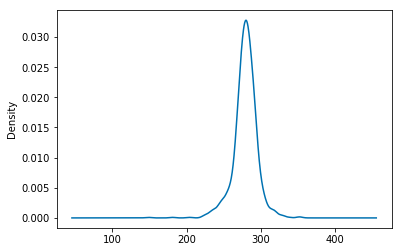

In [3]:
gd = df['Gestational Days']

gd.plot.density()

B) Para o número de dias de gestação, determine com 95% de o Intervalo de Confiança. Não utilize a técnica de bootstrap.

Retorne uma lista com os valores inferior e superior do intervalo de confiança.
Exemplo:
```python
return [inferior,superior]
```

In [4]:
def calcula_IC_gestacao(df):
    conf_95   = df.sort_values(by=['Gestational Days'])
    inf_incof = int(conf_95['Gestational Days'].count() * 0.025)
    sup_incof = conf_95['Gestational Days'].count() - inf_incof
    inferior  = conf_95['Gestational Days'][conf_95.index[inf_incof]]
    superior  = conf_95['Gestational Days'][conf_95.index[sup_incof]]
    return [inferior,superior]

calcula_IC_gestacao(df)

[243, 309]

### C) Na função abaixo, retorne o número da opção que melhor define o que indica o Intervalo de Confiança:

    1: A média da amostra está com 95% de probabilidade dentro do intervalo
    2: 95% dos valores da população estão dentro do intervalo
    3: O intervalo inclui a média da população com 95% de probabilidade
    4: 5% da amostra está a mais que 1.96 de distância da média da população
    5: Nenhuma das anteriores

In [5]:
def resposta():
    return 3

# Exercício 02:

Agora vamos calcular intervalos de confiança utilizando bootstrap.

A) Para a coluna "Maternal Age", plote um histograma dos valores.

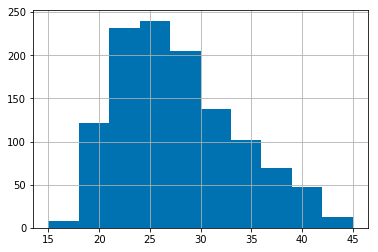

In [6]:
ma = df['Maternal Age'].hist()

B) Utilizando o mesmo atributo, execute um bootstrap com 5000 amostras e plote a distribuição das medianas.

Text(0, 0.5, 'Número de mães grávidas')

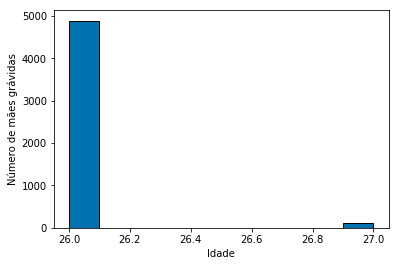

In [7]:
novo = []
for i in range (5000):
    novo.append(df['Maternal Age'].sample( df.size, replace = True).median())
plt.hist(novo, bins=10, edgecolor='k')
plt.xlabel('Idade')
plt.ylabel('Número de mães grávidas')

# Exercício 03:

Plote, em escala log-log, a distribuição dos dados no arquivo "lista.csv".

In [8]:
dados = pd.read_csv('lista.csv')['valores']

A) Calcule a média, mediana, variância, e desvio padrão. Retorne em uma lista da seguinte forma:
```python
return [media,mediana,var,desvio]
```

In [9]:
import math

def ex3(dados):
    media   = dados.mean()
    mediana = dados.median()
    var     = dados.var()
    desvio  = dados.std()
    return [media,mediana,var,desvio]

ex3(dados)

[19.508920875736013,
 1.0042548724785347,
 3257589.8969675843,
 1804.8794688198943]

B) Calcule o intervalo de confiança, com confiança de 95%. Retorne em uma lista da seguinte forma:
```python
return [inferior,superior]
```

In [10]:
def ex3_IC(dados):
    conf_95   = dados.sort_values()
    inf_incof = int(conf_95.count() * 0.025)
    sup_incof = conf_95.count() - inf_incof
    inferior  = conf_95[conf_95.index[inf_incof]]
    superior  = conf_95[conf_95.index[sup_incof]]
    return [inferior,superior]
ex3_IC(dados)

[0.024400960229141955, 39.98538691782685]

C) Plote a distribuição dos valores dos dados, em escala log-log. 

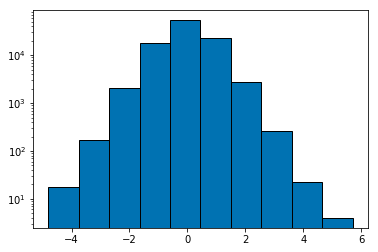

In [11]:
plt.hist(np.log10(dados), log=True, bins=10, edgecolor='k')
plt.show()

D) Tente explicar o por quê de os valores calculados ficaram tão elevados.

RESPOSTA1 - OFICIAL: o gráfico mostra a distribuicao dos elementos, como tiramos o loglog deles, eles ficaram menores e mais perto de 0, além disso, a grande maioria dos nossos dados, são elementos menores e próximos de 0.

RESPOSTA2: Existem dados muito elevados porque existem outliers que interferem bastante em algumas medições dos dados. Quando fazemos dados.sort_values(), por exemplo, vemos que o menor valor é 0.000016 e o maior é 500243.804808, o que nos mostra a discrepância dos dados e explica o porque exitem dados desde 10⁻⁴ até 10⁶ no eixo y